## Names of group members (max 2):
    
    Kevin Vonk, s1706896



## Linear Regression

In [1]:
## This part can be left unchanged.
## %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## a package that does regression, so for comparison
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

## I write formulas in latex (what else?)
from IPython.display import display, Math, Latex

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
%matplotlib inline  

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [2]:
## create a folder data with all data sets
data = np.loadtxt('../data/ex1data1.txt', delimiter=',')
## we add a column in x with only 1s: 
## we need the constant function in our linear approximation
## have a look at np.c is doing, e.g.,  
## https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.c_.html
X = np.c_[np.ones(data.shape[0]),data[:,0]]
y = np.c_[data[:,1]]

## BONUS: Once you have completed the entire notebook you can come back to this point to make a more complex model
## ie. by adding higher order exponents p of data[:,0]**p to the feature vector X. You will probably run into
## the problem of a diverging cost. How could this be solved? 

From now on you should change the lines indicated with ... (and remove ## of course)

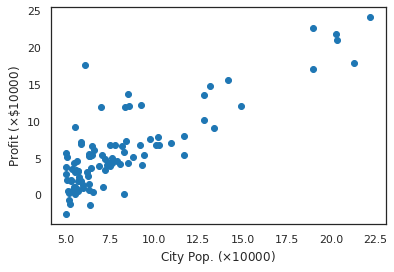

In [3]:
## Make a scatter plot of the data X versus y
## Note that we added ones in the X array
## on x-axis: Population of City in 10,000s
## on y-axis: Profit in $10,000s
plt.scatter(X[:, 1], y)
plt.xlabel(r"City Pop. $(\times 10000)$")
plt.ylabel(r"Profit $(\times \$10000)$");

#### $$ \mbox{The cost function:} \hspace{1cm} J = \frac{1}{2M} \sum_{m=0}^{M-1} \left(\sum_{\ell=0}^1\theta_\ell X_{m, \ell} -y_m\right)^2 = \frac{1}{2M} \|X \cdot \theta - y\|^2$$

In [4]:
def computeCost(X, y, theta):
    M = X.shape[0]
    J = np.linalg.norm(X @ theta - y)**2 / (2*M)

    return J

#### $$ \mbox{The gradient descent:} \hspace{1cm} \theta \to \theta - \frac{\alpha}{M} X^T (X\cdot \theta -y)$$

In [5]:
def gradientDescent(X, y, theta, alpha = 0.01, num_iters = 5500):
    M = y.size
    Jh = np.zeros(num_iters)
    ## keep all data in Jh such that we can plot
    for iter in np.arange(num_iters):
        theta -= alpha / M * X.T @ (X @ theta - y)
        Jh[iter] = computeCost(X, y, theta)
        
    return theta, Jh

 initial cost:  32.07273387745565
theta:  [-3.89558599] [1.19301407]


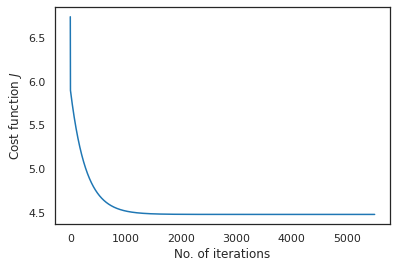

In [6]:
## theta for minimized cost J 
## initializing theta
theta = np.c_[np.zeros(X.shape[1])]
print(' initial cost: ',computeCost(X,y,theta))
theta, Jh = gradientDescent(X, y, theta)
print('theta: ',theta[0], theta[1])
## plot the history of the cost function
## put sensible text on axis
plt.plot(range(Jh.size), Jh)
plt.xlabel("No. of iterations")
plt.ylabel(r"Cost function $J$");

-3.8957808783118484 [1.19303364]


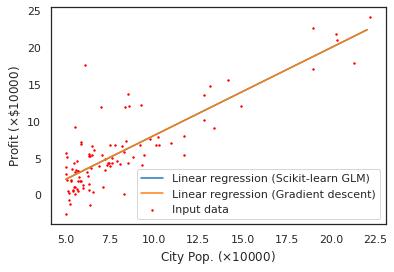

In [7]:
## compare with Scikit-learn Linear regression
## https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
## you will see some boring python stuff here 
regr = LinearRegression()
regr.fit(X[:,1].reshape(-1,1), y.ravel())
print(regr.intercept_, regr.coef_)
xx = np.arange(np.min(X[:,1]),np.max(X[:,1]))
plt.plot(xx, regr.intercept_ + regr.coef_*xx, label='Linear regression (Scikit-learn GLM)')

## add the (same) scatter plot and include also your regression line; add labels
plt.scatter(X[:, 1], y, s=2, c="r", label="Input data")
plt.xlabel(r"City Pop. $(\times 10000)$")
plt.ylabel(r"Profit $(\times \$10000)$")

plt.plot(xx, theta[0] + theta[1] * xx, label='Linear regression (Gradient descent)')
plt.legend(loc=4);
## what to do about the difference (albeit so small)??

We note that there is a small difference between the two regressions. The difference is caused by our convergence limit set in the `gradientDescent()` function, which causes the iteration scheme to exit prematurely. Additionally, we can improve the convergence by taking smaller steps $\alpha$. Setting $\alpha = 0.005$ and $\text{max iter} = 55000$ the difference disappears. The convergence requirement could be improved by stating $|L_{n+1} - L_{n}| < \epsilon; \; n = 0, 1, 2, ...$, where $\epsilon = 10^{-8}$ for example.

In [8]:
## predict profit for a city with population of 35000 and 70000
pop = (35000, 70000)
for p in pop:
    print(f"Predicted profit for pop. {p}: ${theta[0,0] + theta[1,0]*p:.2f}")

Predicted profit for pop. 35000: $41751.60
Predicted profit for pop. 70000: $83507.09


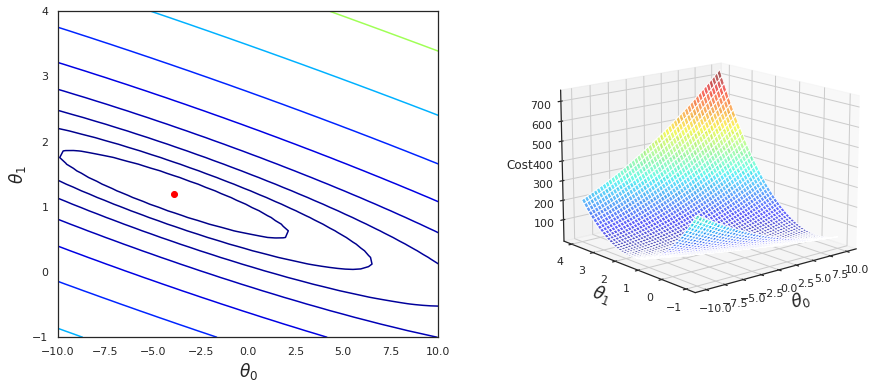

In [9]:
## create grid coordinates for (3D) plotting J as a function of theta0, theta1
## we define gridpoints around the optimal value 
## just study this code, it can be of later use !
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size, B1.size))

## Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = computeCost(X,y, theta=[[xx[i,j]], [yy[i,j]]])

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

## Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1], c='r')

## Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)

## settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)